# Deming Regression

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [14]:
sess = tf.Session()

tf.set_random_seed(42)
np.random.seed(42)

In [15]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data]) # Sepal Length

In [16]:
# Declare batch size
batch_size = 125

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [17]:
# Declare Demming loss function
demming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [18]:
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)


init = tf.global_variables_initializer()
sess.run(init)

In [19]:
# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[3.0731564]] b = [[1.7809086]]
Loss = 0.47353575
Step #200 A = [[2.4822485]] b = [[2.522591]]
Loss = 0.41145673
Step #300 A = [[1.761314]] b = [[3.6220057]]
Loss = 0.3706183
Step #400 A = [[1.0064851]] b = [[4.548491]]
Loss = 0.26182407
Step #500 A = [[0.9594669]] b = [[4.6100893]]
Loss = 0.24352416
Step #600 A = [[0.9620294]] b = [[4.6306334]]
Loss = 0.26397175
Step #700 A = [[1.022876]] b = [[4.601824]]
Loss = 0.28466457
Step #800 A = [[0.9983598]] b = [[4.5968537]]
Loss = 0.27558845
Step #900 A = [[1.0454365]] b = [[4.6071696]]
Loss = 0.28947482
Step #1000 A = [[0.9992417]] b = [[4.6528597]]
Loss = 0.25259653
Step #1100 A = [[1.0096213]] b = [[4.6474957]]
Loss = 0.27844408
Step #1200 A = [[0.9660147]] b = [[4.5729938]]
Loss = 0.2515693
Step #1300 A = [[1.008082]] b = [[4.5830784]]
Loss = 0.25517425
Step #1400 A = [[1.0347892]] b = [[4.6193395]]
Loss = 0.25613913
Step #1500 A = [[0.953963]] b = [[4.595498]]
Loss = 0.24617329


In [20]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

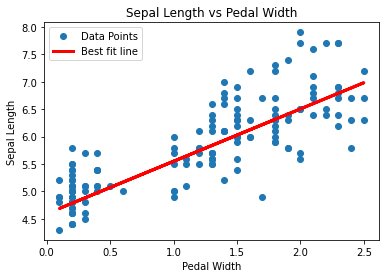

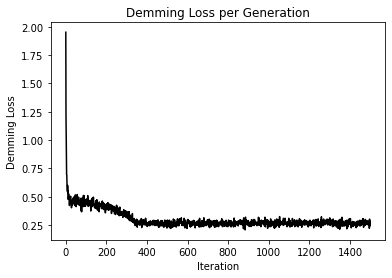

In [21]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Demming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Demming Loss')
plt.show()

# LASSO and Ridge Regression

In [30]:
# Specify 'Ridge' or 'LASSO'
#regression_type = 'LASSO'
regression_type = 'Ridge'

In [31]:
ops.reset_default_graph()

sess = tf.Session()

In [32]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [33]:
if regression_type == 'LASSO':
    # Declare Lasso loss function
    # Lasso Loss = L2_Loss + heavyside_step,
    # Where heavyside_step ~ 0 if A < constant, otherwise ~ 99
    lasso_param = tf.constant(0.9)
    heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-50., tf.subtract(A, lasso_param)))))
    regularization_param = tf.multiply(heavyside_step, 99.)
    loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

elif regression_type == 'Ridge':
    # Declare the Ridge loss function
    # Ridge loss = L2_loss + L2 norm of slope
    ridge_param = tf.constant(1.)
    ridge_loss = tf.reduce_mean(tf.square(A))
    loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)
    
else:
    print('Invalid regression_type parameter value',file=sys.stderr)


In [34]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [35]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('\n')

Step #300 A = [[1.706729]] b = [[1.5547526]]
Loss = [8.266696]


Step #600 A = [[1.6157353]] b = [[2.56619]]
Loss = [4.7824936]


Step #900 A = [[1.3463289]] b = [[3.2469506]]
Loss = [3.0798805]


Step #1200 A = [[1.1117644]] b = [[3.7608497]]
Loss = [2.064789]


Step #1500 A = [[0.9335517]] b = [[4.1537986]]
Loss = [1.4875118]




In [36]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

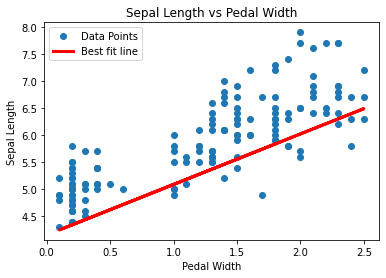

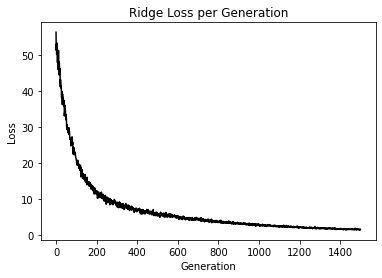

In [37]:
%matplotlib inline
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title(regression_type + ' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

# Elastic Net Regression

In [51]:
ops.reset_default_graph()

sess = tf.Session()

In [52]:
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [53]:
x_vals[:8]

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2]])

In [54]:
y_vals[:8]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. ])

In [55]:
seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

batch_size = 50

x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [56]:
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)

l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))

e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)

loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [57]:
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[ 1.5329143 ]
 [ 0.32204112]
 [-0.35786846]] b = [[0.43616185]]
Loss = [2.4512296]
Step #500 A = [[ 1.1602426 ]
 [ 0.5051452 ]
 [-0.11060885]] b = [[0.44183946]]
Loss = [1.295723]
Step #750 A = [[1.02697754e+00]
 [5.50201058e-01]
 [1.17049036e-04]] b = [[0.4969656]]
Loss = [1.1800689]
Step #1000 A = [[9.7358328e-01]
 [5.7086974e-01]
 [7.0311915e-05]] b = [[0.5688087]]
Loss = [1.0396371]


In [58]:
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

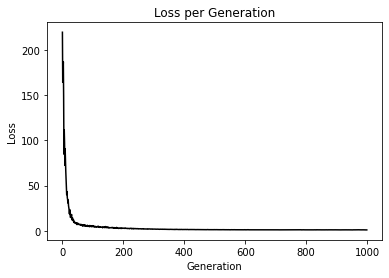

In [59]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

# Logistic Regression

In [67]:
import os.path
import csv

In [68]:
ops.reset_default_graph()

sess = tf.Session()

In [69]:
birth_weight_file = './data/birth_weight.csv'

In [70]:
birth_data = []
with open(birth_weight_file, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    birth_header = next(csv_reader)
    for row in csv_reader:
        birth_data.append(row)

birth_data = [[float(x) for x in row] for row in birth_data]

In [71]:
y_vals = np.array([x[0] for x in birth_data])

x_vals = np.array([x[1:8] for x in birth_data])

In [74]:
y_vals, y_vals.shape

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]), (189,))

In [75]:
x_vals, x_vals.shape

(array([[ 28., 113.,   1., ...,   1.,   0.,   1.],
        [ 29., 130.,   0., ...,   0.,   0.,   1.],
        [ 34., 187.,   1., ...,   0.,   1.,   0.],
        ...,
        [ 19., 120.,   0., ...,   0.,   1.,   0.],
        [ 24., 216.,   0., ...,   0.,   0.,   0.],
        [ 45., 123.,   0., ...,   1.,   0.,   0.]]), (189, 7))

In [76]:
seed = 99
np.random.seed(seed)
tf.set_random_seed(seed)

In [77]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [78]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

In [79]:
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [80]:
# Declare batch size
batch_size = 25

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[7,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss function (Cross Entropy loss)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [81]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Actual Prediction
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

# Training loop
loss_vec = []
train_acc = []
test_acc = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)
    if (i+1)%300==0:
        print('Loss = ' + str(temp_loss))

Loss = 0.6944471
Loss = 0.7304496
Loss = 0.62496805
Loss = 0.69695
Loss = 0.6096429


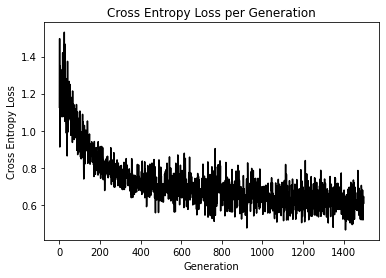

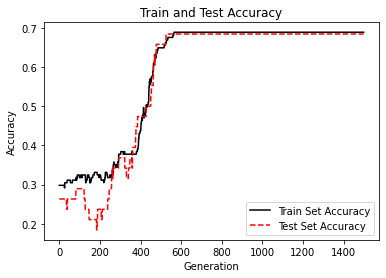

In [82]:
%matplotlib inline
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()